## Run perceptron.py on Iris UC Irvine data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [2]:
import perceptron
import adaline

In [3]:
# download Iris data from UC Irvine and load into pandas dataframe
s = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Now we will predict Iris-versicolor (class 1) versus Iris-setosa (class 0) based on sepal length and petal length features

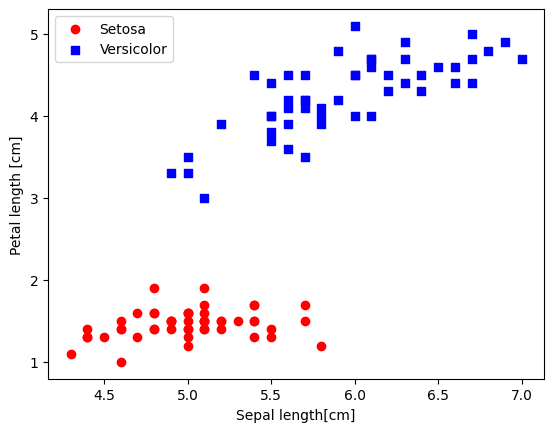

In [4]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data 
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length[cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

We see that the classes are linearly separable, so the perceptron should classify them perfectly. Let's try it!

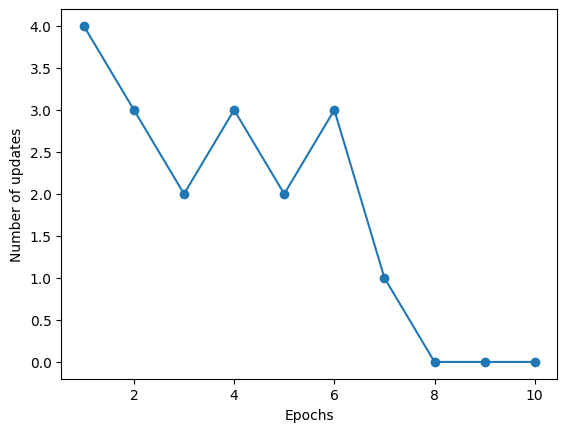

In [5]:
# run the perceptron
ppn = perceptron.Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [6]:
# helper function to plot decision regions of the classifier
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')


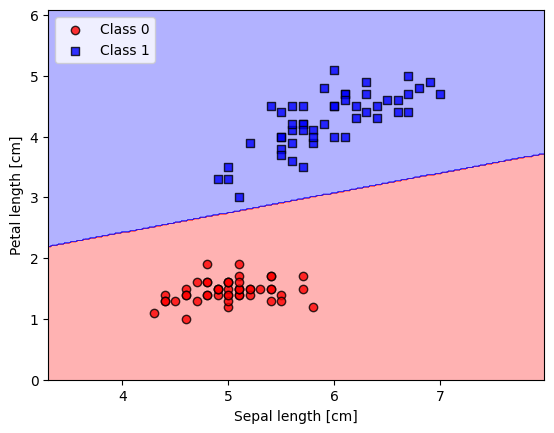

In [7]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Now let's do the same with Adaline. It should still have 0 error.

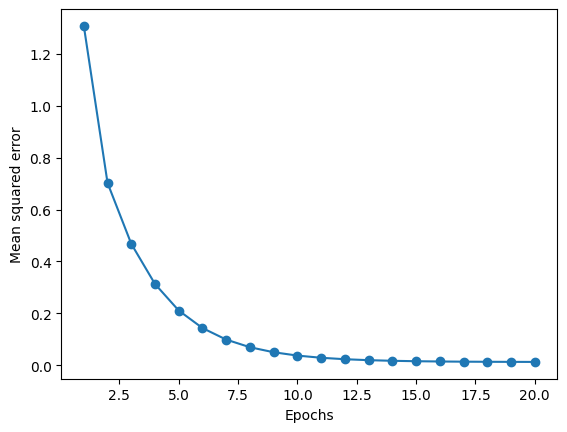

In [8]:
# run adaline with gradient descent
ada_gd = adaline.AdalineGD(eta=0.5, n_iter=20)
# we first standardize the data for stability
X_std = np.copy(X)
X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X_std[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X_std[:, 1].std()

ada_gd.fit(X_std, y)
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.show()

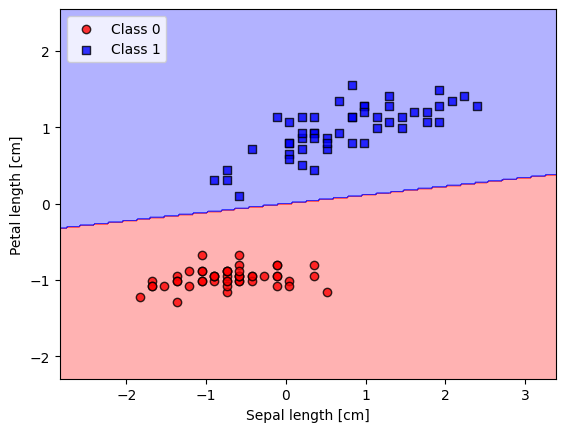

In [9]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Finally, we repeat with the stochastic gradient descent (SGD) version of AdaLine.

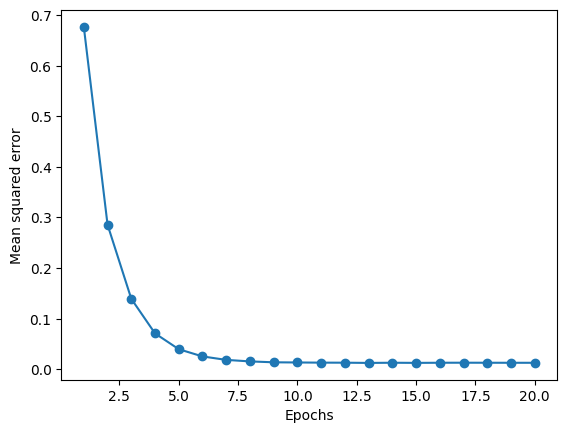

In [11]:
# run adaline with gradient descent
ada_sgd = adaline.AdalineSGD(eta=0.01, n_iter=20)
# we first standardize the data for stability
X_std = np.copy(X)
X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X_std[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X_std[:, 1].std()

ada_sgd.fit(X_std, y)
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.show()

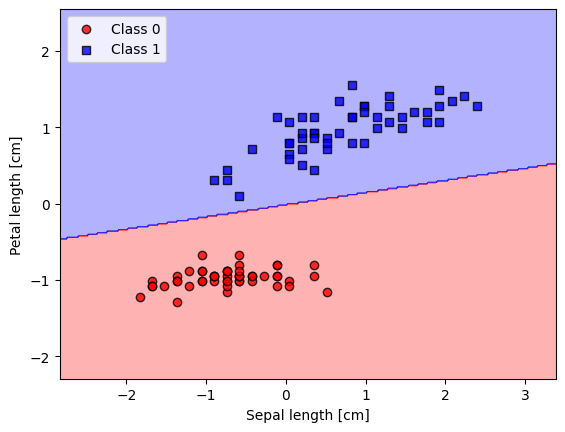

In [12]:
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Note how the SGD version of Adaline converged faster than the GD version, due to many more updates (per data point) within each epoch. Also note how the learning rate had to be much lower since losses on individual data points can be noisy.